In [1]:
import pandas as pd
import numpy as np

In [2]:
df = pd.read_csv('Housing.csv')
df

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished
...,...,...,...,...,...,...,...,...,...,...,...,...,...
540,1820000,3000,2,1,1,yes,no,yes,no,no,2,no,unfurnished
541,1767150,2400,3,1,1,no,no,no,no,no,0,no,semi-furnished
542,1750000,3620,2,1,1,yes,no,no,no,no,0,no,unfurnished
543,1750000,2910,3,1,1,no,no,no,no,no,0,no,furnished


In [3]:
# Categorical to numeric
df = df.replace(to_replace={'yes':1,'no':0,'furnished':1,'unfurnished':-1,'semi-furnished':0})
df

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,1,0,0,0,1,2,1,1
1,12250000,8960,4,4,4,1,0,0,0,1,3,0,1
2,12250000,9960,3,2,2,1,0,1,0,0,2,1,0
3,12215000,7500,4,2,2,1,0,1,0,1,3,1,1
4,11410000,7420,4,1,2,1,1,1,0,1,2,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
540,1820000,3000,2,1,1,1,0,1,0,0,2,0,-1
541,1767150,2400,3,1,1,0,0,0,0,0,0,0,0
542,1750000,3620,2,1,1,1,0,0,0,0,0,0,-1
543,1750000,2910,3,1,1,0,0,0,0,0,0,0,1


In [4]:
# Filling empty values
df.fillna(df.mean())
df

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,1,0,0,0,1,2,1,1
1,12250000,8960,4,4,4,1,0,0,0,1,3,0,1
2,12250000,9960,3,2,2,1,0,1,0,0,2,1,0
3,12215000,7500,4,2,2,1,0,1,0,1,3,1,1
4,11410000,7420,4,1,2,1,1,1,0,1,2,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
540,1820000,3000,2,1,1,1,0,1,0,0,2,0,-1
541,1767150,2400,3,1,1,0,0,0,0,0,0,0,0
542,1750000,3620,2,1,1,1,0,0,0,0,0,0,-1
543,1750000,2910,3,1,1,0,0,0,0,0,0,0,1


In [5]:
#filter based feature selection
high_corr = abs(df.corr()['price']).sort_values(ascending=False)[1:].index.to_list()
high_corr = high_corr[:6]
high_corr

['area', 'bathrooms', 'airconditioning', 'stories', 'parking', 'bedrooms']

In [6]:
#Normalization
df = df/df.max()
df

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,1.000000,0.458025,0.666667,0.50,0.75,1.0,0.0,0.0,0.0,1.0,0.666667,1.0,1.0
1,0.921053,0.553086,0.666667,1.00,1.00,1.0,0.0,0.0,0.0,1.0,1.000000,0.0,1.0
2,0.921053,0.614815,0.500000,0.50,0.50,1.0,0.0,1.0,0.0,0.0,0.666667,1.0,0.0
3,0.918421,0.462963,0.666667,0.50,0.50,1.0,0.0,1.0,0.0,1.0,1.000000,1.0,1.0
4,0.857895,0.458025,0.666667,0.25,0.50,1.0,1.0,1.0,0.0,1.0,0.666667,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
540,0.136842,0.185185,0.333333,0.25,0.25,1.0,0.0,1.0,0.0,0.0,0.666667,0.0,-1.0
541,0.132868,0.148148,0.500000,0.25,0.25,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0
542,0.131579,0.223457,0.333333,0.25,0.25,1.0,0.0,0.0,0.0,0.0,0.000000,0.0,-1.0
543,0.131579,0.179630,0.500000,0.25,0.25,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,1.0


In [7]:
#outlier removal

print("Mean:",df['area'].mean(),"Std:",df['area'].std())
df['area'].loc[np.logical_or(df['area'] < df['area'].mean() - 2*df['area'].std(),df['area'] > df['area'].mean() + 2*df['area'].std())] = df['area'].median()
print("Mean:",df['area'].mean(),"Std:",df['area'].std())

Mean: 0.3179346471854117 Std: 0.1339593223770866
Mean: 0.2995073054706082 Std: 0.10297608928168137


In [24]:
def hypothesis(theta, X):
    return theta*X
def Cost(X, y, theta,l):
    y1 = hypothesis(theta, X)
    y1=np.sum(y1, axis=1)
    return sum(np.sqrt((y1-y)**2))/(2*len(X))+l*(np.sum(theta)/len(theta))  #L1 regularization
def gradientDescent(X, y, theta, alpha, epoch,l):
    costs = []  
    k = 0
    while k < epoch:        
        y1 = hypothesis(theta, X)
        y1 = np.sum(y1, axis=1)
        for c in range(0, len(X.columns)):
            theta[c] = theta[c] - alpha*(sum((y1-y)*X.iloc[:,c])/len(X))
        cost = Cost(X, y, theta,l)
        costs.append(cost)
        k += 1
    return costs, cost, theta

Starting exhaustive search...

Iteration 1
features selected:  ['area']
Beginning descent...
Lowest cost:  0.05844368176702604


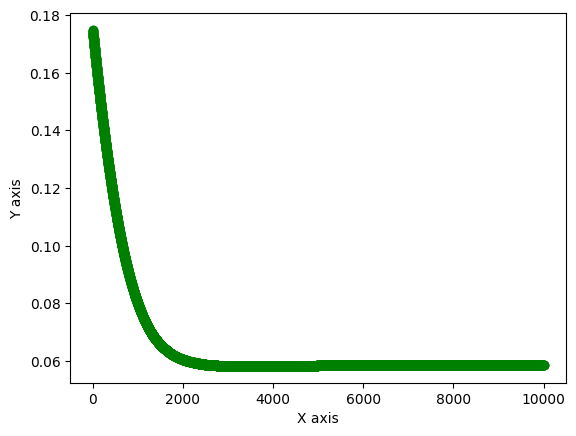

train RMSE score: 0.12660362694868224
train R2 score: 0.21712573560451387

test RMSE score: 0.12024099812793831
test R2 score: 0.17140141624642935
Improvement detected!

Coefficients: [1.1565918291362933]



----------------



Iteration 2
features selected:  ['bathrooms']
Beginning descent...
Lowest cost:  0.0611064253420834


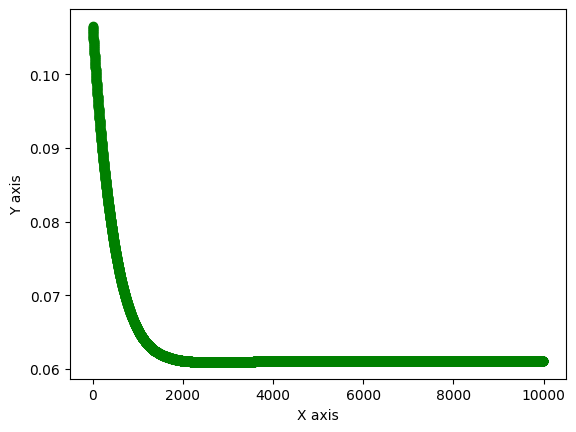

train RMSE score: 0.13863464100986286
train R2 score: 0.06126449127131073

test RMSE score: 0.1263023318470009
test R2 score: 0.08575671584988032

Coefficients: [1.0596410776125171]



----------------



Iteration 3
features selected:  ['airconditioning']
Beginning descent...
Lowest cost:  0.12936240440615632


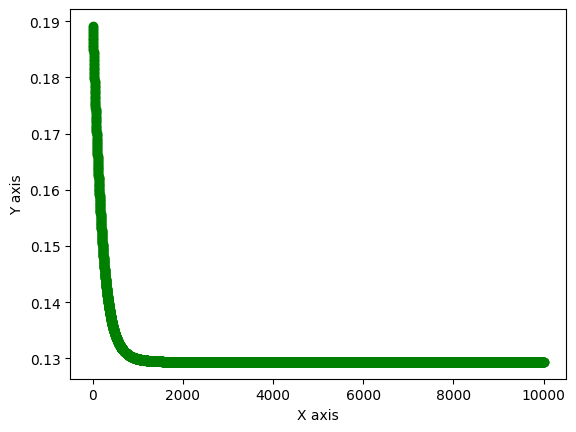

train RMSE score: 0.2878775873013445
train R2 score: -3.0477662965378043

test RMSE score: 0.2934176089660579
test R2 score: -3.9341391009659032

Coefficients: [0.4492807780320448]



----------------



Iteration 4
features selected:  ['stories']
Beginning descent...
Lowest cost:  0.07086191544641242


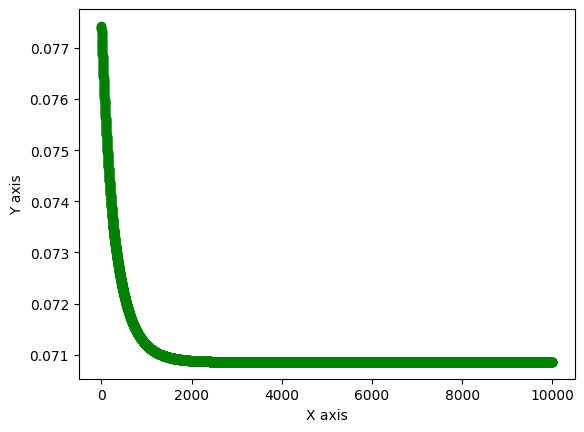

train RMSE score: 0.16709388795143718
train R2 score: -0.3637063105070135

test RMSE score: 0.15090924767028227
test R2 score: -0.3051810190038251

Coefficients: [0.6889031889463217]



----------------



Iteration 5
features selected:  ['parking']
Beginning descent...
Lowest cost:  0.1292742598627194


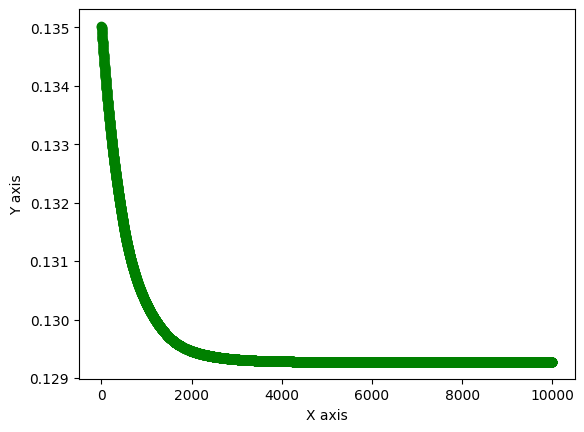

train RMSE score: 0.27787109887812866
train R2 score: -2.771260033450864

test RMSE score: 0.27603592604529664
test R2 score: -3.366869961517474

Coefficients: [0.7150382661094393]



----------------



Iteration 6
features selected:  ['bedrooms']
Beginning descent...
Lowest cost:  0.05884862515601877


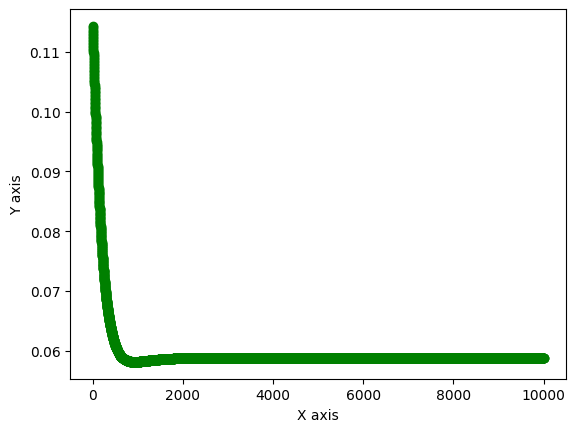

train RMSE score: 0.13551021530422755
train R2 score: 0.10310047886438767

test RMSE score: 0.1369505288993755
test R2 score: -0.07489605486430606

Coefficients: [0.7194479215524127]



----------------



Iteration 7
features selected:  ['area', 'bathrooms']
Beginning descent...
Lowest cost:  0.04584002332909242


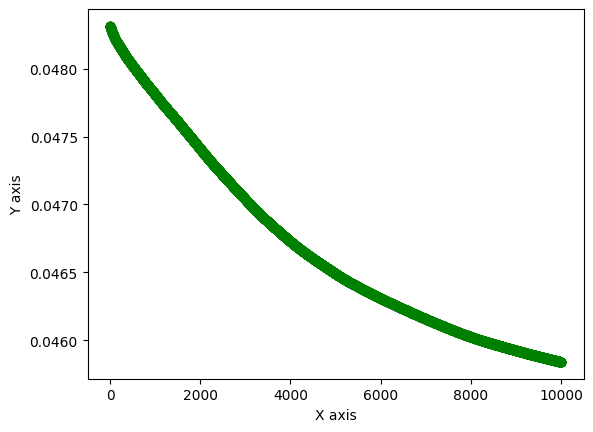

train RMSE score: 0.10686960642918912
train R2 score: 0.44216194039075574

test RMSE score: 0.09709681400662738
test R2 score: 0.4596825409545169
Improvement detected!

Coefficients: [0.8017949683278882, 0.3744759345071858]



----------------



Iteration 8
features selected:  ['area', 'airconditioning']
Beginning descent...
Lowest cost:  0.050795616171979044


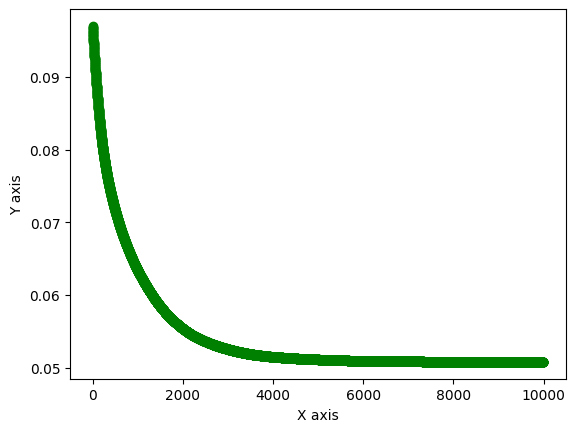

train RMSE score: 0.12097194273605959
train R2 score: 0.2852255303683914

test RMSE score: 0.11468308673647715
test R2 score: 0.24623183984224084

Coefficients: [1.057982358133272, 0.0840160652564419]



----------------



Iteration 9
features selected:  ['area', 'stories']
Beginning descent...
Lowest cost:  0.04574952684360409


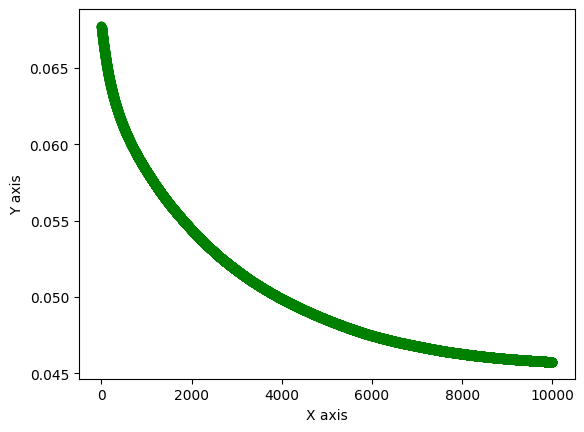

train RMSE score: 0.11292315699345103
train R2 score: 0.37717541980086067

test RMSE score: 0.09976048544412736
test R2 score: 0.4296306905639513

Coefficients: [0.6952326019518782, 0.31368155853932966]



----------------



Iteration 10
features selected:  ['area', 'parking']
Beginning descent...
Lowest cost:  0.05211138620200942


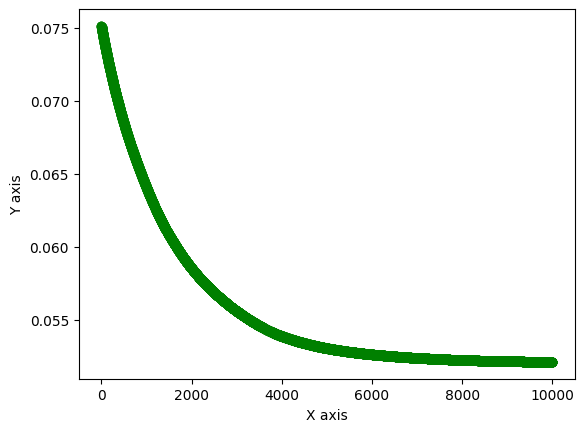

train RMSE score: 0.12414816580012446
train R2 score: 0.24719874120253738

test RMSE score: 0.1170812180518874
test R2 score: 0.21437823777119158

Coefficients: [1.070350729169623, 0.09947897787262747]



----------------



Iteration 11
features selected:  ['area', 'bedrooms']
Beginning descent...
Lowest cost:  0.04681510944825141


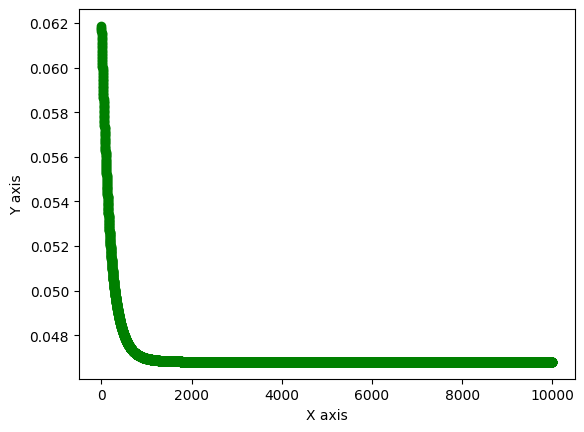

train RMSE score: 0.11261100875195267
train R2 score: 0.38061395089400984

test RMSE score: 0.1037608042794376
test R2 score: 0.3829708237896984

Coefficients: [0.6532548018131582, 0.33630844353699446]



----------------



Iteration 12
features selected:  ['bathrooms', 'airconditioning']
Beginning descent...
Lowest cost:  0.05219666466338399


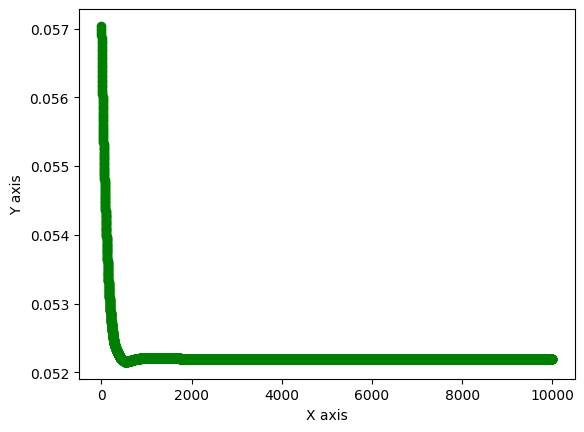

train RMSE score: 0.12695756704080663
train R2 score: 0.21274232383618796

test RMSE score: 0.11347824907748871
test R2 score: 0.2619865212654323

Coefficients: [0.9390103769204363, 0.11926223795219526]



----------------



Iteration 13
features selected:  ['bathrooms', 'stories']
Beginning descent...
Lowest cost:  0.05092612454491536


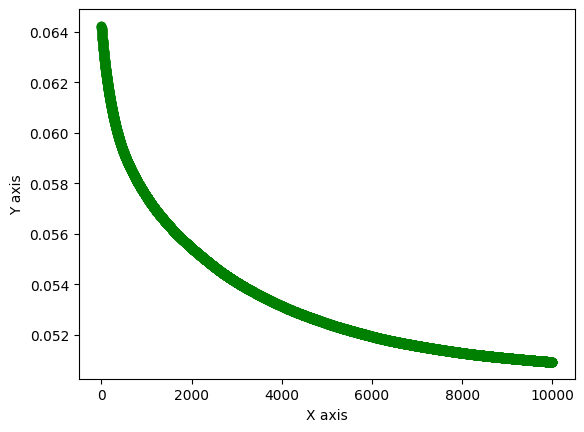

train RMSE score: 0.1248292295803495
train R2 score: 0.23891650855809887

test RMSE score: 0.11167651580698358
test R2 score: 0.28523586410520996

Coefficients: [0.6277611516524947, 0.31740879538742867]



----------------



Iteration 14
features selected:  ['bathrooms', 'parking']
Beginning descent...
Lowest cost:  0.05380664435994811


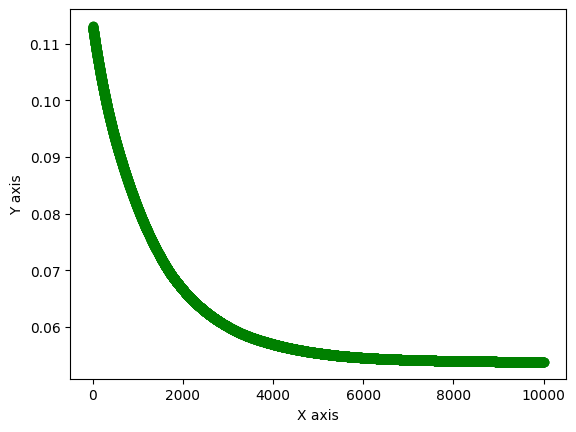

train RMSE score: 0.13067641053208512
train R2 score: 0.16594610519404251

test RMSE score: 0.11184726408209864
test R2 score: 0.2830485099807464

Coefficients: [0.9357307430416517, 0.16727387879210368]



----------------



Iteration 15
features selected:  ['bathrooms', 'bedrooms']
Beginning descent...
Lowest cost:  0.05028889420734818


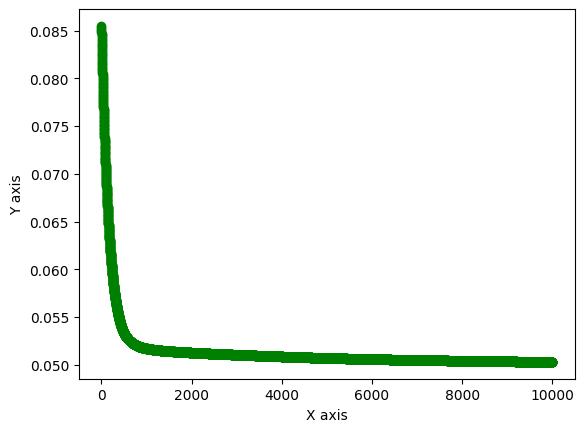

train RMSE score: 0.1212801294358357
train R2 score: 0.2815789892558478

test RMSE score: 0.11674632100468478
test R2 score: 0.21886616719352214

Coefficients: [0.41824565452193074, 0.45647322848577293]



----------------



Iteration 16
features selected:  ['airconditioning', 'stories']
Beginning descent...
Lowest cost:  0.06438438132966677


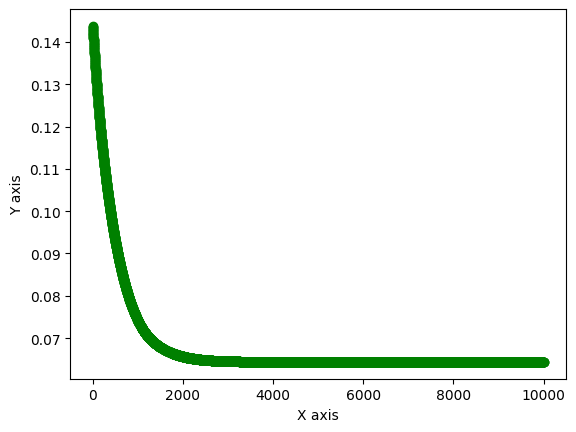

train RMSE score: 0.15643063660311532
train R2 score: -0.1952076023981857

test RMSE score: 0.15043520879417044
test R2 score: -0.29699418079770146

Coefficients: [0.12770806247925548, 0.5996930061412078]



----------------



Iteration 17
features selected:  ['airconditioning', 'parking']
Beginning descent...
Lowest cost:  0.10313033304396638


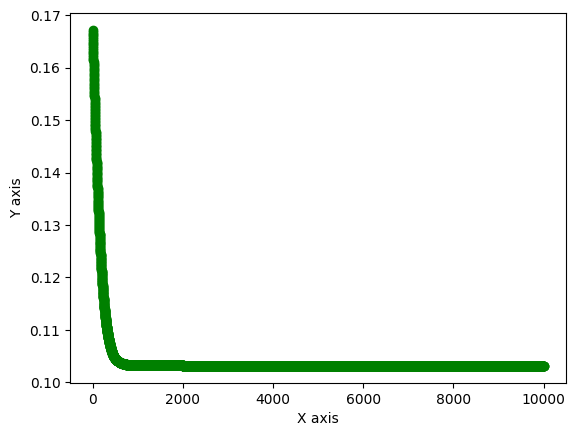

train RMSE score: 0.2319388280572483
train R2 score: -1.6275236780096938

test RMSE score: 0.24052022131028042
test R2 score: -2.315448076872541

Coefficients: [0.29663895695692244, 0.50554883347457]



----------------



Iteration 18
features selected:  ['airconditioning', 'bedrooms']
Beginning descent...
Lowest cost:  0.05097614618861786


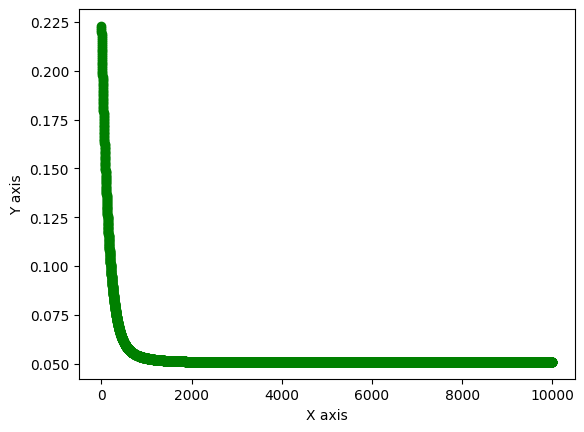

train RMSE score: 0.12536986099110164
train R2 score: 0.2323097760588596

test RMSE score: 0.11825146678482581
test R2 score: 0.19859487747939075

Coefficients: [0.11103430508068134, 0.6423592789542025]



----------------



Iteration 19
features selected:  ['stories', 'parking']
Beginning descent...
Lowest cost:  0.06134443616995259


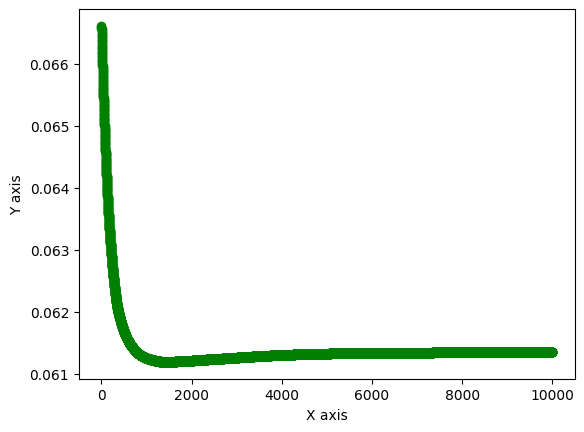

train RMSE score: 0.14598296940424754
train R2 score: -0.04088825487760617

test RMSE score: 0.13282539880388064
test R2 score: -0.011116734729145428

Coefficients: [0.5732130858896389, 0.2640575144328571]



----------------



Iteration 20
features selected:  ['stories', 'bedrooms']
Beginning descent...
Lowest cost:  0.05233682341478816


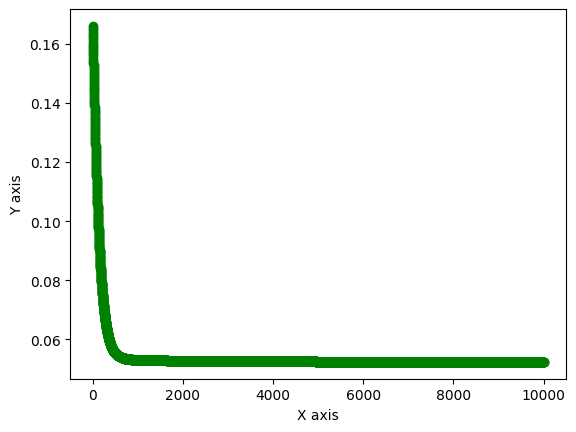

train RMSE score: 0.12896723846146352
train R2 score: 0.18762131016136452

test RMSE score: 0.12538417944337815
test R2 score: 0.09900055073571212

Coefficients: [0.19584452334016403, 0.5394266558709278]



----------------



Iteration 21
features selected:  ['parking', 'bedrooms']
Beginning descent...
Lowest cost:  0.05311209520529221


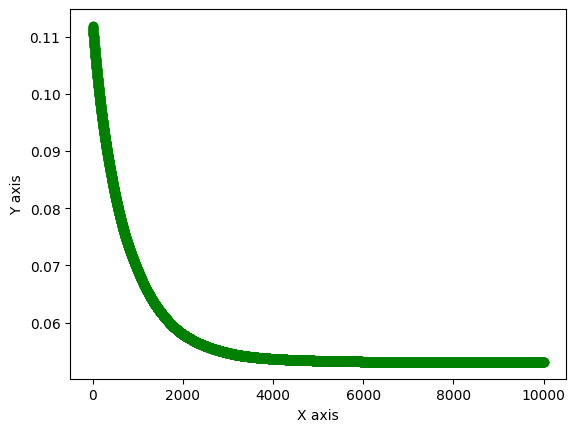

train RMSE score: 0.12704003914464676
train R2 score: 0.21171918064473094

test RMSE score: 0.12494185326181664
test R2 score: 0.10534637007720504

Coefficients: [0.16377656476547944, 0.6396538355917815]



----------------



Iteration 22
features selected:  ['area', 'bathrooms', 'airconditioning']
Beginning descent...
Lowest cost:  0.042073864095145394


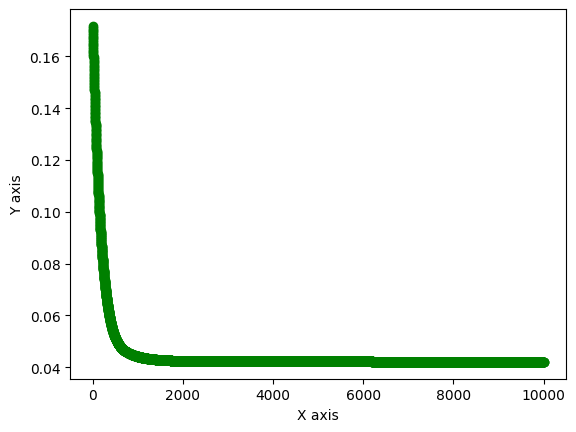

train RMSE score: 0.1007737869590786
train R2 score: 0.5039849205015601

test RMSE score: 0.08943543174506931
test R2 score: 0.5415855942010126
Improvement detected!

Coefficients: [0.6788896524300858, 0.41172246973750093, 0.07000668780825099]



----------------



Iteration 23
features selected:  ['area', 'bathrooms', 'stories']
Beginning descent...
Lowest cost:  0.04086383153254237


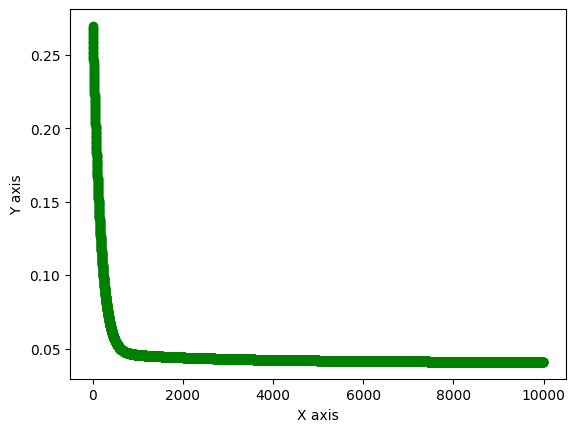

train RMSE score: 0.10196465045987457
train R2 score: 0.4921926400028278

test RMSE score: 0.08946156978850636
test R2 score: 0.5413176063055873

Coefficients: [0.45944067332893523, 0.4620754148000845, 0.16347211403661846]



----------------



Iteration 24
features selected:  ['area', 'bathrooms', 'parking']
Beginning descent...
Lowest cost:  0.04382628265657906


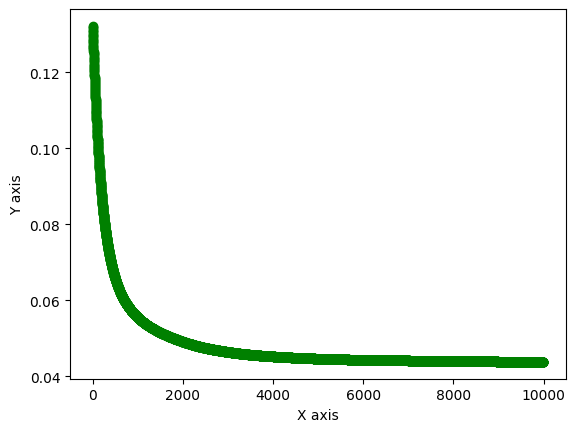

train RMSE score: 0.10539908292467697
train R2 score: 0.4574080005975135

test RMSE score: 0.09096009412795372
test R2 score: 0.5258226082432809

Coefficients: [0.4855382602221112, 0.5992736511181721, 0.08415800742262607]



----------------



Iteration 25
features selected:  ['area', 'bathrooms', 'bedrooms']
Beginning descent...
Lowest cost:  0.04297213069107502


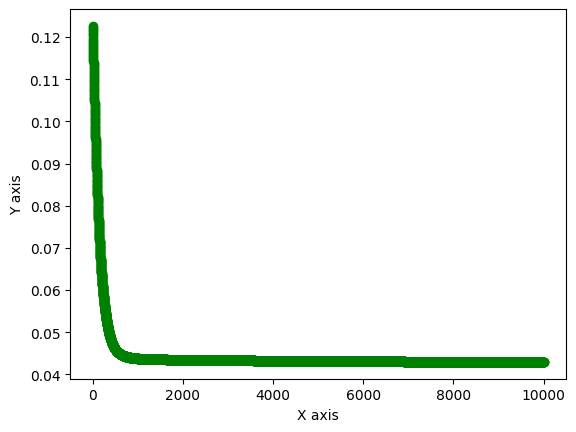

train RMSE score: 0.10409771942198166
train R2 score: 0.4707240605751454

test RMSE score: 0.09353952098903934
test R2 score: 0.4985480500833033

Coefficients: [0.5356837640430695, 0.3137659439815941, 0.20818250552925574]



----------------



Iteration 26
features selected:  ['area', 'airconditioning', 'stories']
Beginning descent...
Lowest cost:  0.04226835220980955


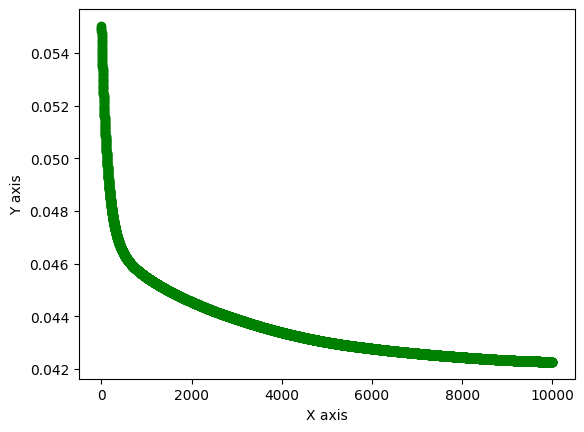

train RMSE score: 0.10814941288718531
train R2 score: 0.42872127109267943

test RMSE score: 0.09863641162910153
test R2 score: 0.44241180572421457

Coefficients: [0.7057128926055818, 0.06705896882659557, 0.2585276494025972]



----------------



Iteration 27
features selected:  ['area', 'airconditioning', 'parking']
Beginning descent...
Lowest cost:  0.04882168760136545


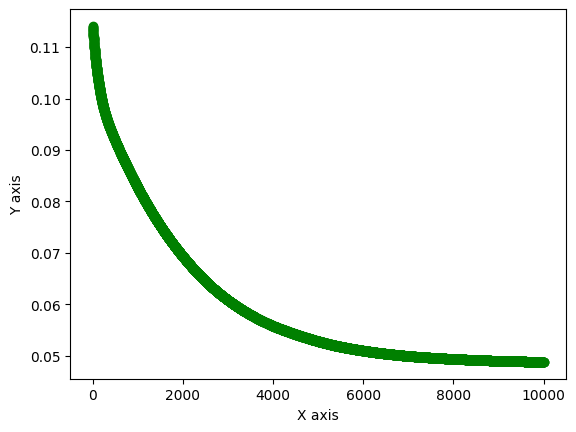

train RMSE score: 0.11900284992916313
train R2 score: 0.3083053033328206

test RMSE score: 0.11257105397163707
test R2 score: 0.2737393636583183

Coefficients: [0.9525095840945772, 0.08844583803915117, 0.10782766464602786]



----------------



Iteration 28
features selected:  ['area', 'airconditioning', 'bedrooms']
Beginning descent...
Lowest cost:  0.043433389949258584


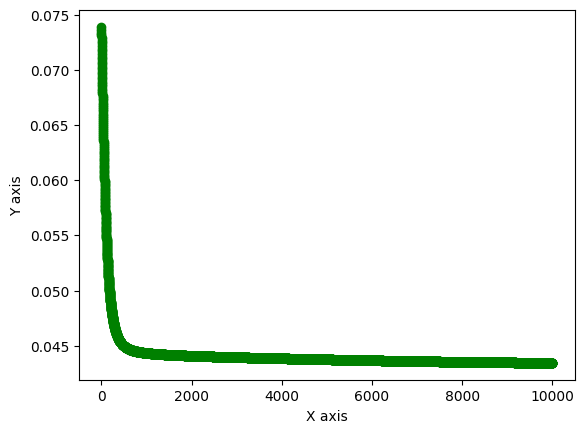

train RMSE score: 0.10751720883177622
train R2 score: 0.4353807451949677

test RMSE score: 0.09557310435001065
test R2 score: 0.4765075448924788

Coefficients: [0.6803397114074211, 0.07342112956810179, 0.26732847850306]



----------------



Iteration 29
features selected:  ['area', 'stories', 'parking']
Beginning descent...
Lowest cost:  0.043902266030252844


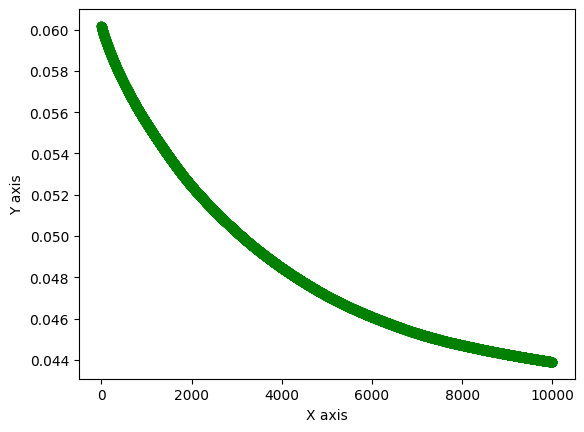

train RMSE score: 0.10991467841999614
train R2 score: 0.4099197096123728

test RMSE score: 0.09626860094889356
test R2 score: 0.46886079161206806

Coefficients: [0.5655269228729285, 0.32371896003085454, 0.13758256787337414]



----------------



Iteration 30
features selected:  ['area', 'stories', 'bedrooms']
Beginning descent...
Lowest cost:  0.04279440013224504


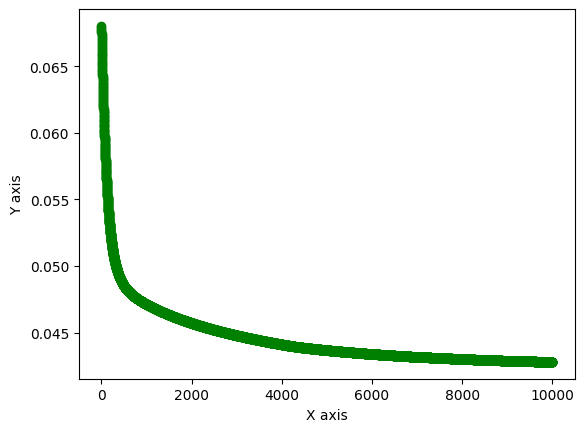

train RMSE score: 0.10908574078064526
train R2 score: 0.4187865017529466

test RMSE score: 0.0983539124816788
test R2 score: 0.4456011476170476

Coefficients: [0.4846562296293134, 0.17003854702343418, 0.2800042361388419]



----------------



Iteration 31
features selected:  ['area', 'parking', 'bedrooms']
Beginning descent...
Lowest cost:  0.04478852608470543


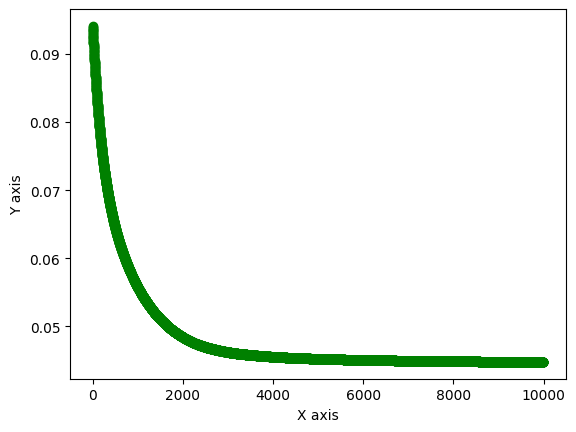

train RMSE score: 0.11028579100961464
train R2 score: 0.40592832434830395

test RMSE score: 0.10095941254886305
test R2 score: 0.4158388493811297

Coefficients: [0.50870582744392, 0.09989912299402962, 0.37379912171116647]



----------------



Iteration 32
features selected:  ['bathrooms', 'airconditioning', 'stories']
Beginning descent...
Lowest cost:  0.0473571710351499


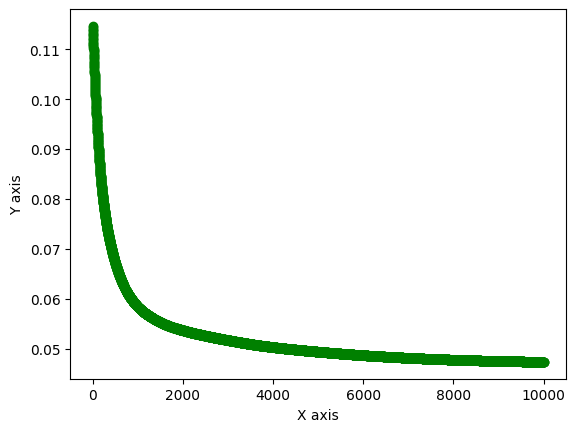

train RMSE score: 0.11735639524842056
train R2 score: 0.32731267631630134

test RMSE score: 0.10709790339771703
test R2 score: 0.34264347346752044

Coefficients: [0.5785919540670047, 0.0957073270496222, 0.2802766690264282]



----------------



Iteration 33
features selected:  ['bathrooms', 'airconditioning', 'parking']
Beginning descent...
Lowest cost:  0.04866167860602977


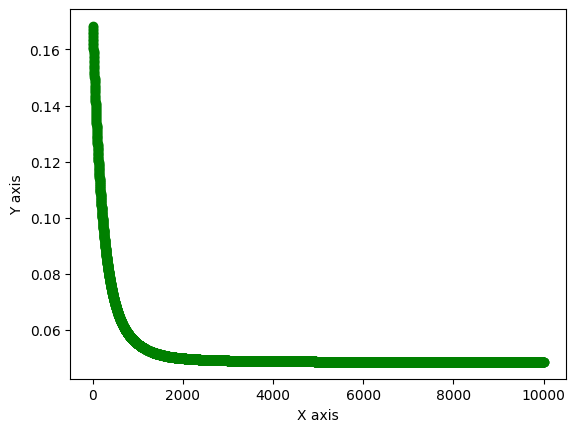

train RMSE score: 0.12050924858669043
train R2 score: 0.2906828204500248

test RMSE score: 0.10266836826623435
test R2 score: 0.3958950967473174

Coefficients: [0.8466377715909982, 0.10927480932828787, 0.14075206267994997]



----------------



Iteration 34
features selected:  ['bathrooms', 'airconditioning', 'bedrooms']
Beginning descent...
Lowest cost:  0.0452240067819953


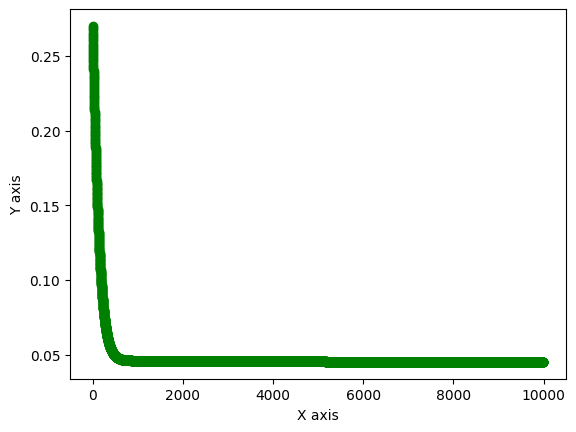

train RMSE score: 0.11231754134447683
train R2 score: 0.3838380188024749

test RMSE score: 0.10112671345388517
test R2 score: 0.4139012060849836

Coefficients: [0.3972980409957666, 0.0986184556628445, 0.400796041790132]



----------------



Iteration 35
features selected:  ['bathrooms', 'stories', 'parking']
Beginning descent...
Lowest cost:  0.04790112734775394


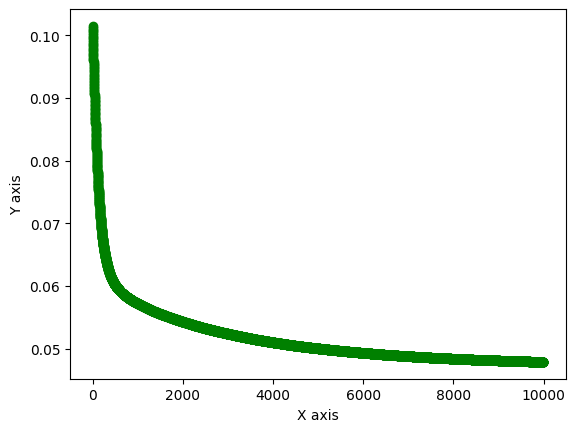

train RMSE score: 0.11688691097734417
train R2 score: 0.3326840820407039

test RMSE score: 0.09970132138902821
test R2 score: 0.4303070175599757

Coefficients: [0.49246122047700763, 0.3221339959954507, 0.17438506395603057]



----------------



Iteration 36
features selected:  ['bathrooms', 'stories', 'bedrooms']
Beginning descent...
Lowest cost:  0.04703813978550799


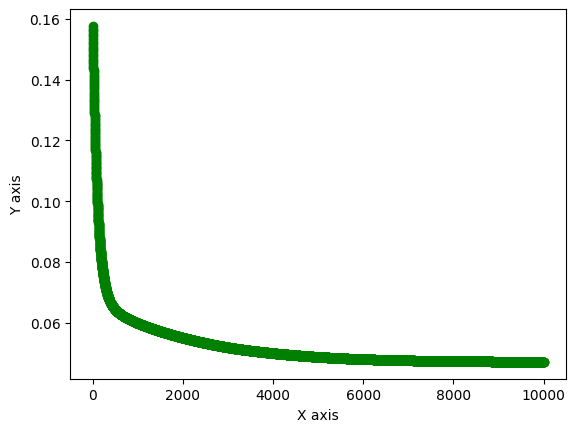

train RMSE score: 0.11778198348962811
train R2 score: 0.32242488268600344

test RMSE score: 0.10940996760643967
test R2 score: 0.31395465770358055

Coefficients: [0.3563448882245532, 0.19725682992003682, 0.31029954361039047]



----------------



Iteration 37
features selected:  ['bathrooms', 'parking', 'bedrooms']
Beginning descent...
Lowest cost:  0.04748581649641455


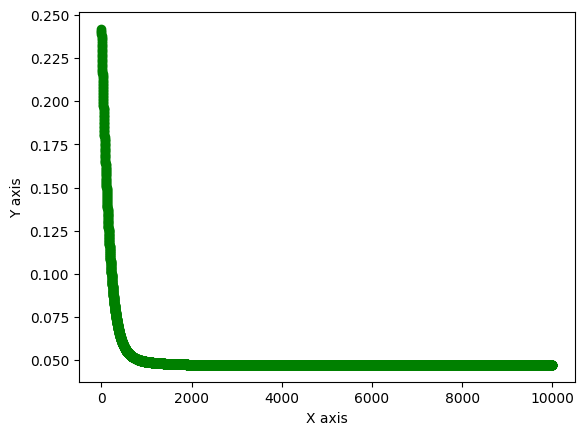

train RMSE score: 0.11480681015309523
train R2 score: 0.35622364374641546

test RMSE score: 0.10381511575193778
test R2 score: 0.3823247121121317

Coefficients: [0.4962506443418435, 0.1292901933304475, 0.34079076927008517]



----------------



Iteration 38
features selected:  ['airconditioning', 'stories', 'parking']
Beginning descent...
Lowest cost:  0.05713542571612093


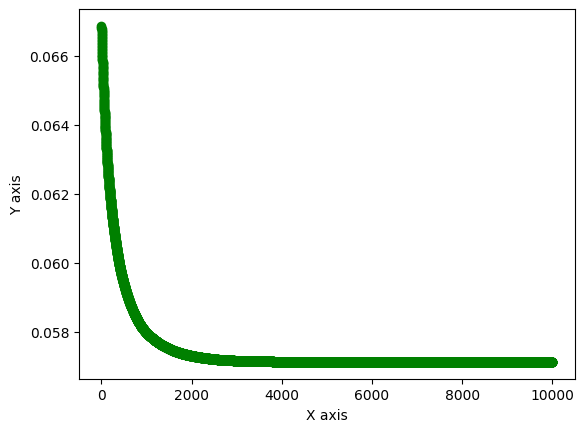

train RMSE score: 0.13843839325688923
train R2 score: 0.06392031150362065

test RMSE score: 0.13369027590810376
test R2 score: -0.024327141728144985

Coefficients: [0.10203071551062089, 0.5126054220741567, 0.23970446241452012]



----------------



Iteration 39
features selected:  ['airconditioning', 'stories', 'bedrooms']
Beginning descent...
Lowest cost:  0.04873132423705202


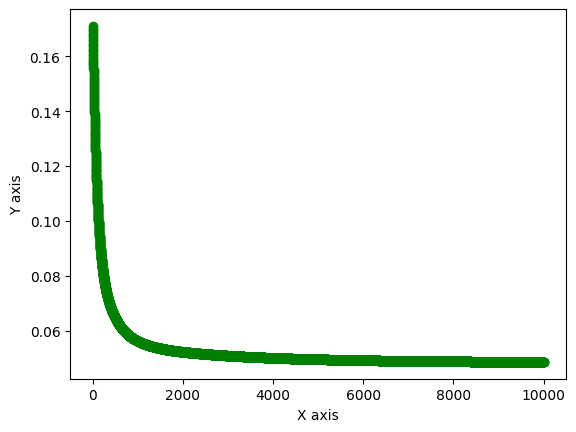

train RMSE score: 0.12126707525475587
train R2 score: 0.28173363772596394

test RMSE score: 0.11345782341828736
test R2 score: 0.26225217667087586

Coefficients: [0.0975284604223906, 0.20681264981569397, 0.45734298751342717]



----------------



Iteration 40
features selected:  ['airconditioning', 'parking', 'bedrooms']
Beginning descent...
Lowest cost:  0.04825431934394987


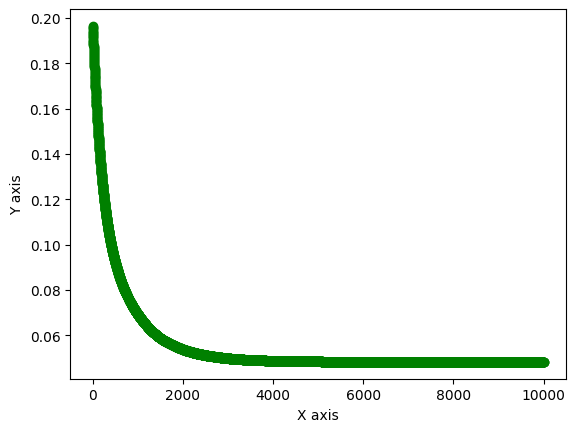

train RMSE score: 0.1183070666811565
train R2 score: 0.31637002858522234

test RMSE score: 0.1098070906056764
test R2 score: 0.30896537139506863

Coefficients: [0.10071497179039883, 0.14514815703433712, 0.5787687431576944]



----------------



Iteration 41
features selected:  ['stories', 'parking', 'bedrooms']
Beginning descent...
Lowest cost:  0.04853166895799515


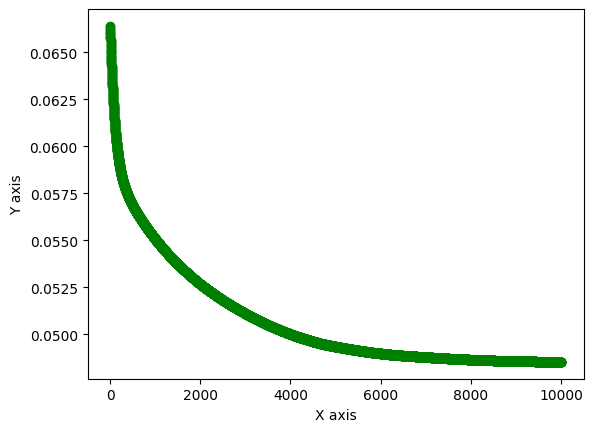

train RMSE score: 0.12001245975005446
train R2 score: 0.29651896217241225

test RMSE score: 0.11146227995851726
test R2 score: 0.2879755846727651

Coefficients: [0.25825489928685286, 0.17524274838198958, 0.39172583296464586]



----------------



Iteration 42
features selected:  ['area', 'bathrooms', 'airconditioning', 'stories']
Beginning descent...
Lowest cost:  0.03861885057927414


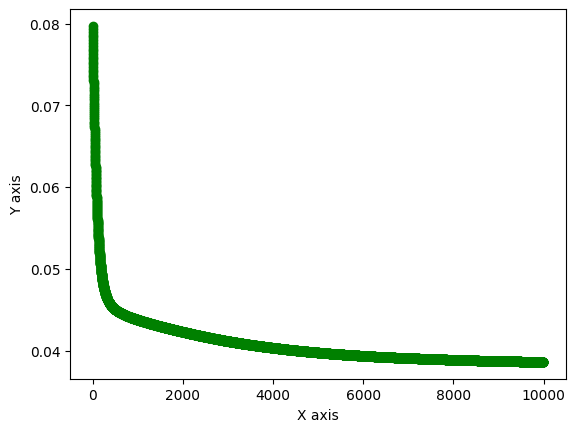

train RMSE score: 0.0969872609899854
train R2 score: 0.5405596746887023

test RMSE score: 0.0858547059120944
test R2 score: 0.5775578433566237
Improvement detected!

Coefficients: [0.6066672948583123, 0.34945616205427615, 0.061101156315650565, 0.10385114339194573]



----------------



Iteration 43
features selected:  ['area', 'bathrooms', 'airconditioning', 'parking']
Beginning descent...
Lowest cost:  0.0403212250664893


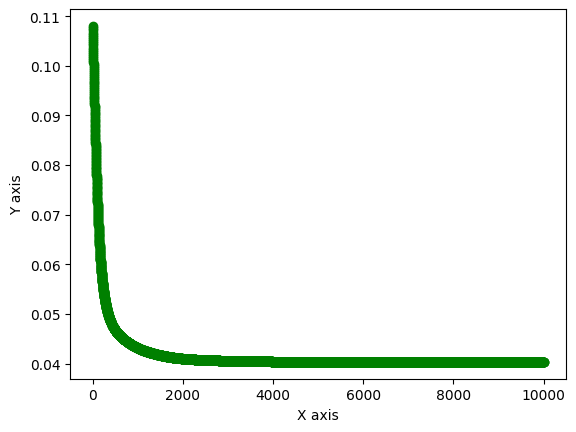

train RMSE score: 0.09871819789948436
train R2 score: 0.524014022144834

test RMSE score: 0.08472990833200081
test R2 score: 0.588554312814066
Improvement detected!

Coefficients: [0.5515637190798003, 0.4735465920117991, 0.07179375634093337, 0.06817736072647099]



----------------



Iteration 44
features selected:  ['area', 'bathrooms', 'airconditioning', 'bedrooms']
Beginning descent...
Lowest cost:  0.040646009178671144


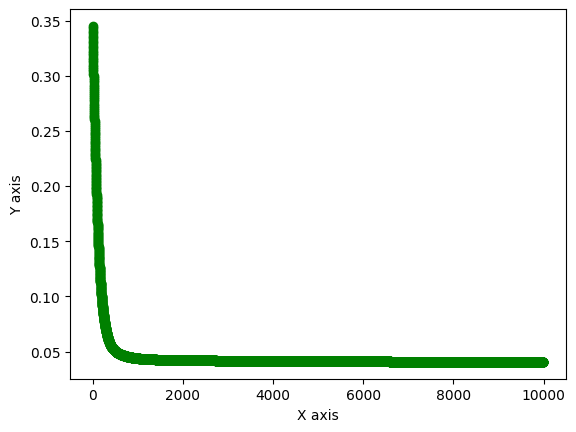

train RMSE score: 0.09953300211901792
train R2 score: 0.5161241708894658

test RMSE score: 0.08705793862916869
test R2 score: 0.5656340229399708

Coefficients: [0.5490280747776072, 0.48069292620980464, 0.06962150359630447, 0.039899212608433356]



----------------



Iteration 45
features selected:  ['area', 'bathrooms', 'stories', 'parking']
Beginning descent...
Lowest cost:  0.0389211809643485


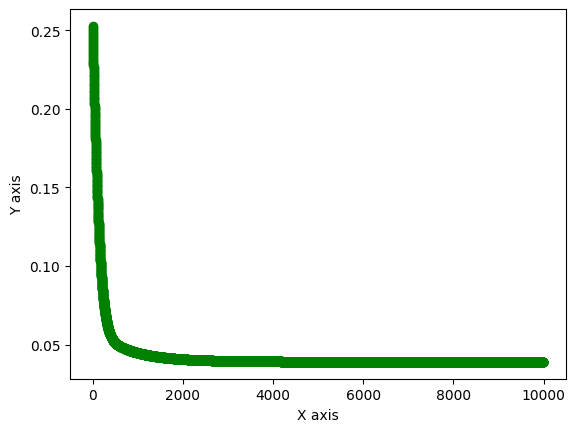

train RMSE score: 0.09817669777570885
train R2 score: 0.529221563641564

test RMSE score: 0.08360039655866992
test R2 score: 0.5994509405289867
Improvement detected!

Coefficients: [0.5005415802783107, 0.3655099933955376, 0.1593638379465648, 0.08641336015268707]



----------------



Iteration 46
features selected:  ['area', 'bathrooms', 'stories', 'bedrooms']
Beginning descent...
Lowest cost:  0.039971411123046044


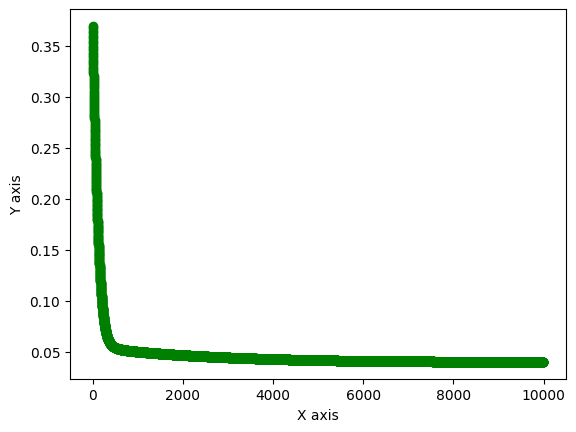

train RMSE score: 0.10071192118257218
train R2 score: 0.5045937482470715

test RMSE score: 0.08907838675806305
test R2 score: 0.5452384608734437

Coefficients: [0.5373581654028378, 0.3855529798637764, 0.09723554802620954, 0.07069819616759483]



----------------



Iteration 47
features selected:  ['area', 'bathrooms', 'parking', 'bedrooms']
Beginning descent...
Lowest cost:  0.04167042968069516


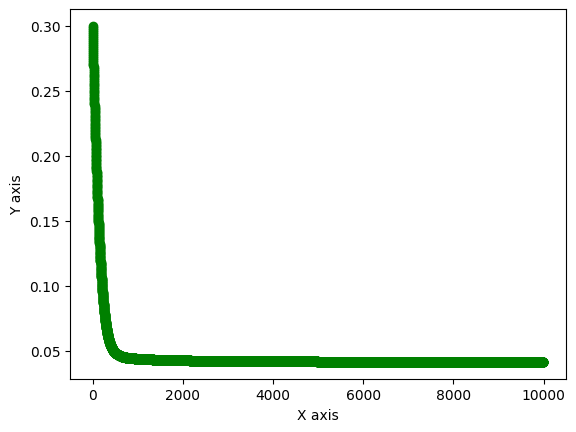

train RMSE score: 0.10213614680999426
train R2 score: 0.49048302112666853

test RMSE score: 0.08940205325780551
test R2 score: 0.5419277030007497

Coefficients: [0.4377830520988491, 0.31887951075341725, 0.08494096361331024, 0.2211298024885489]



----------------



Iteration 48
features selected:  ['area', 'airconditioning', 'stories', 'parking']
Beginning descent...
Lowest cost:  0.040951377724230104


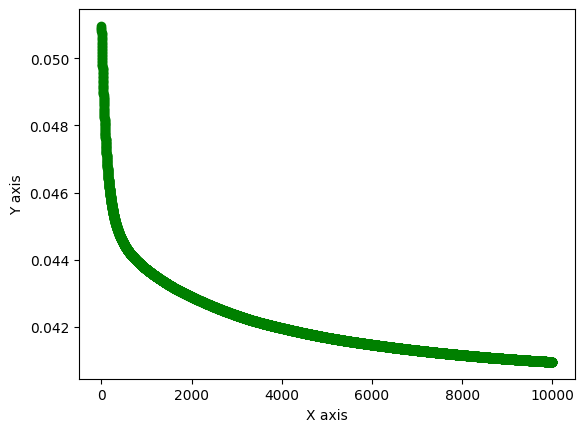

train RMSE score: 0.10479689607510846
train R2 score: 0.4635903762860928

test RMSE score: 0.09523758769068372
test R2 score: 0.48017661353568974

Coefficients: [0.6156100040466552, 0.06310180412406292, 0.2613578789315941, 0.11096374635467789]



----------------



Iteration 49
features selected:  ['area', 'airconditioning', 'stories', 'bedrooms']
Beginning descent...
Lowest cost:  0.04004163135520233


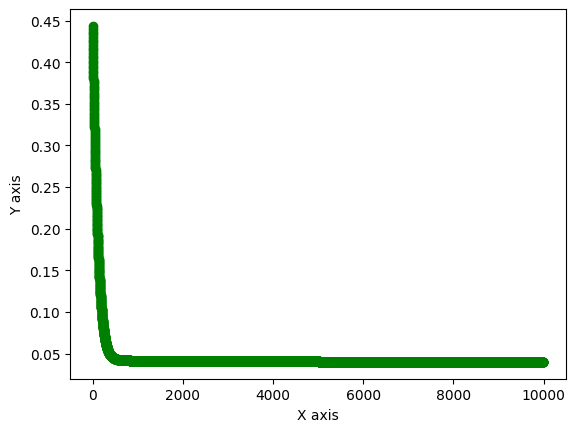

train RMSE score: 0.10434586193507864
train R2 score: 0.4681977343862045

test RMSE score: 0.09263663882624
test R2 score: 0.508181773698511

Coefficients: [0.46070342784562585, 0.07270565079053136, 0.13034708422935068, 0.2804741449451916]



----------------



Iteration 50
features selected:  ['area', 'airconditioning', 'parking', 'bedrooms']
Beginning descent...
Lowest cost:  0.04216903898757462


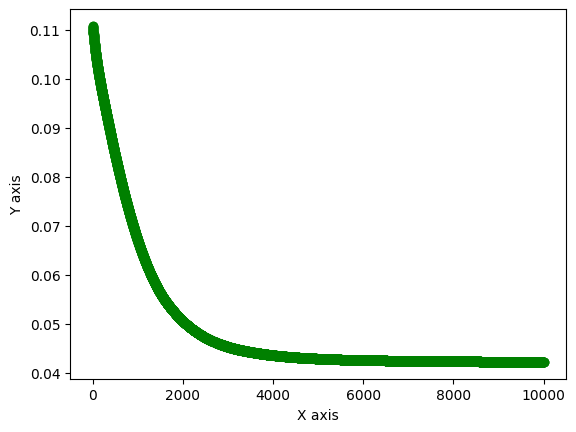

train RMSE score: 0.1050911759657085
train R2 score: 0.46057356554454654

test RMSE score: 0.09253875272428484
test R2 score: 0.5092206009816735

Coefficients: [0.43543985389387074, 0.07821148553995302, 0.09480586994105372, 0.3648951312510408]



----------------



Iteration 51
features selected:  ['area', 'stories', 'parking', 'bedrooms']
Beginning descent...
Lowest cost:  0.04057723254848868


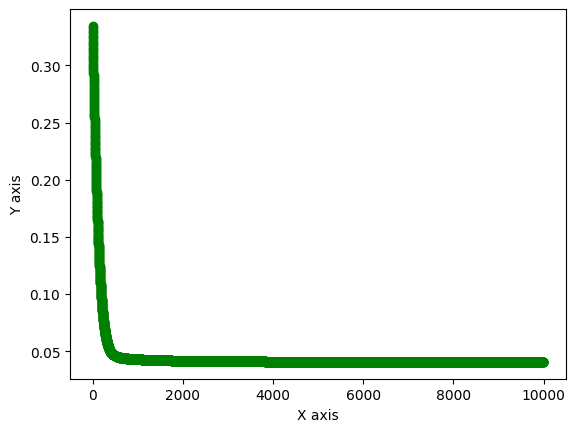

train RMSE score: 0.1044564952224434
train R2 score: 0.46706944387484983

test RMSE score: 0.09242365721507188
test R2 score: 0.5104406601569105

Coefficients: [0.516383599843145, 0.1617671138909521, 0.10055560237029015, 0.21933994006030433]



----------------



Iteration 52
features selected:  ['bathrooms', 'airconditioning', 'stories', 'parking']
Beginning descent...
Lowest cost:  0.04446809416592554


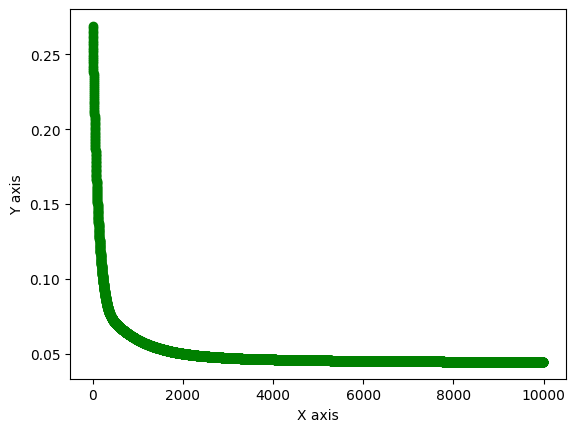

train RMSE score: 0.10976245649091847
train R2 score: 0.41155299395457035

test RMSE score: 0.09641354177928371
test R2 score: 0.4672602342120392

Coefficients: [0.5115625102272414, 0.08411802855300443, 0.2603308102846496, 0.15164121044148948]



----------------



Iteration 53
features selected:  ['bathrooms', 'airconditioning', 'stories', 'bedrooms']
Beginning descent...
Lowest cost:  0.04348252457689077


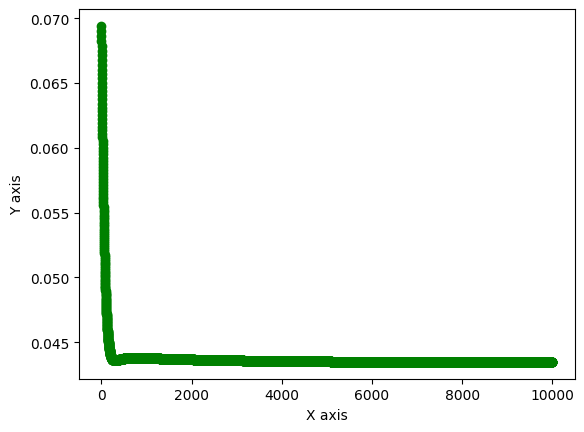

train RMSE score: 0.10951874622493082
train R2 score: 0.4141632009530558

test RMSE score: 0.09862836739239277
test R2 score: 0.44250274959465175

Coefficients: [0.436646800454298, 0.08973835297899445, 0.12474374918208476, 0.26432117971746755]



----------------



Iteration 54
features selected:  ['bathrooms', 'airconditioning', 'parking', 'bedrooms']
Beginning descent...
Lowest cost:  0.04420399239510482


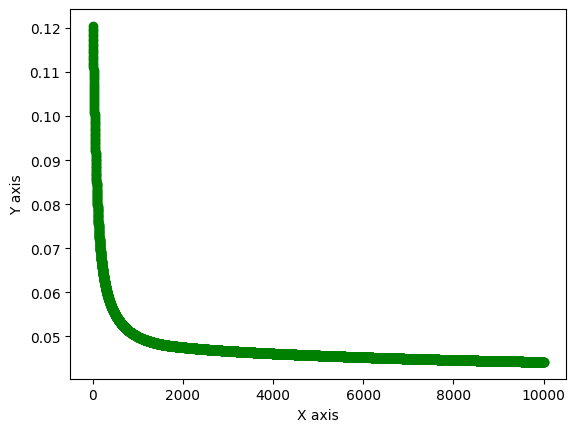

train RMSE score: 0.10914017212317789
train R2 score: 0.41820633199534607

test RMSE score: 0.09694346100264412
test R2 score: 0.4613879289845948

Coefficients: [0.2488229846294813, 0.0917014023667106, 0.12278871536503375, 0.4426396182357225]



----------------



Iteration 55
features selected:  ['bathrooms', 'stories', 'parking', 'bedrooms']
Beginning descent...
Lowest cost:  0.04463198378529638


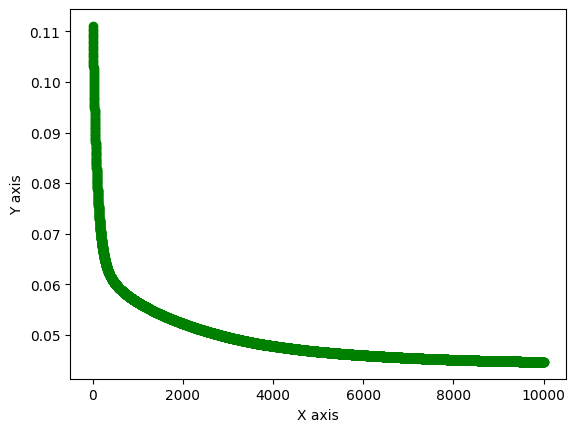

train RMSE score: 0.11109744750849901
train R2 score: 0.3971519178937474

test RMSE score: 0.09870272515246341
test R2 score: 0.4416618176306376

Coefficients: [0.29334826567383293, 0.2104345658206641, 0.1507668611419792, 0.264515535343424]



----------------



Iteration 56
features selected:  ['airconditioning', 'stories', 'parking', 'bedrooms']
Beginning descent...
Lowest cost:  0.04494932076532986


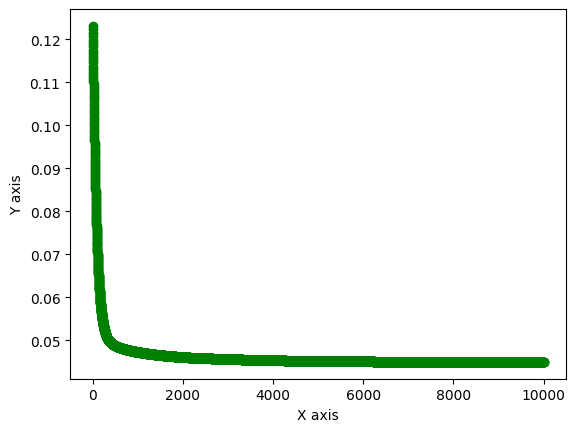

train RMSE score: 0.11312278584712751
train R2 score: 0.37497137838503947

test RMSE score: 0.10449302648508976
test R2 score: 0.3742315582497101

Coefficients: [0.08589927146236803, 0.1949931861238189, 0.15356747768763113, 0.4034123056479416]



----------------



Iteration 57
features selected:  ['area', 'bathrooms', 'airconditioning', 'stories', 'parking']
Beginning descent...
Lowest cost:  0.03724151477628088


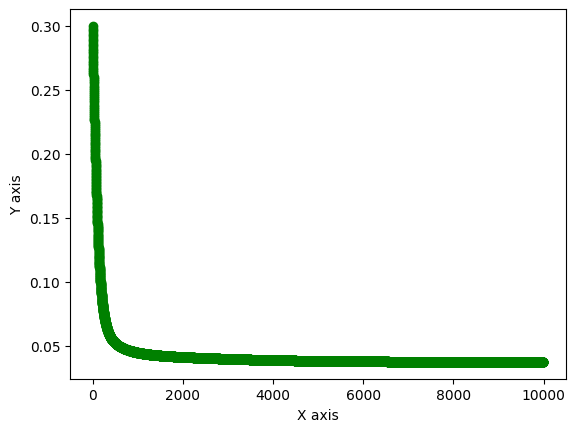

train RMSE score: 0.09543394772664904
train R2 score: 0.5551582915429676

test RMSE score: 0.08304350128116798
test R2 score: 0.6047695976276168
Improvement detected!

Coefficients: [0.5495382347295107, 0.23874603898792393, 0.05873322120939898, 0.17130765416435736, 0.08248682157467156]



----------------



Iteration 58
features selected:  ['area', 'bathrooms', 'airconditioning', 'stories', 'bedrooms']
Beginning descent...
Lowest cost:  0.03825025095069617


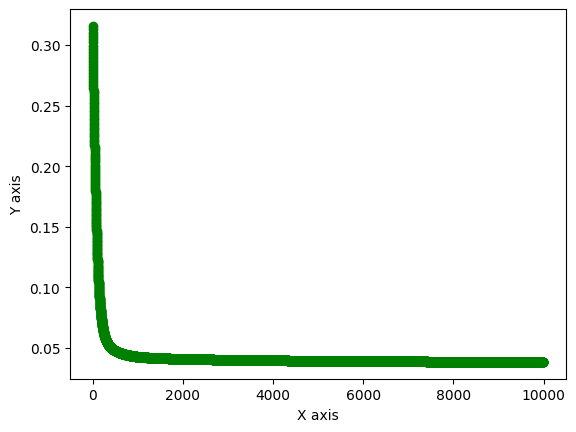

train RMSE score: 0.09674282885880749
train R2 score: 0.5428725653136752

test RMSE score: 0.08464005324112586
test R2 score: 0.589426516902342

Coefficients: [0.47625135986902595, 0.43187889311272176, 0.06569109090590922, 0.09368964652754566, 0.032435602768367856]



----------------



Iteration 59
features selected:  ['area', 'bathrooms', 'airconditioning', 'parking', 'bedrooms']
Beginning descent...
Lowest cost:  0.03957117265033005


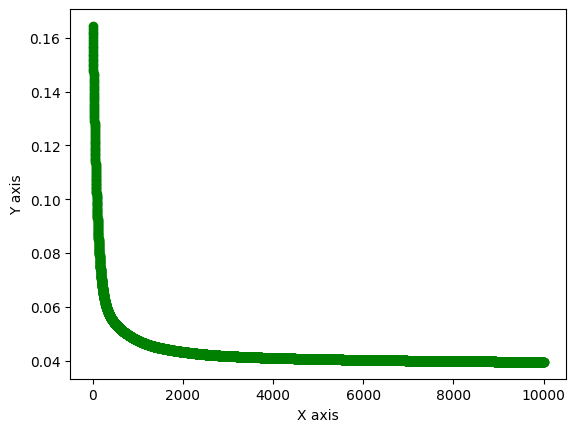

train RMSE score: 0.09896694533761599
train R2 score: 0.52161224686887

test RMSE score: 0.08293923713711399
test R2 score: 0.6057614269621956
Improvement detected!

Coefficients: [0.23781448980011233, 0.41434307312521107, 0.07826828215149435, 0.08973244793403076, 0.22096317692611697]



----------------



Iteration 60
features selected:  ['area', 'bathrooms', 'stories', 'parking', 'bedrooms']
Beginning descent...
Lowest cost:  0.039260989044948444


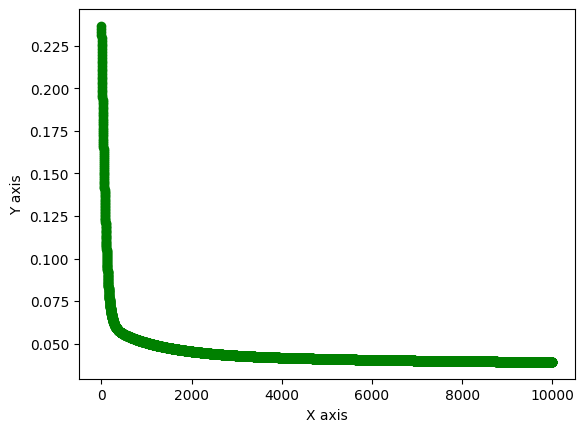

train RMSE score: 0.09940841082648202
train R2 score: 0.5173348041766321

test RMSE score: 0.08633981006130019
test R2 score: 0.5727705135634711

Coefficients: [0.43149234792144964, 0.21848355991958518, 0.10764114846302557, 0.08850204620906217, 0.19034650304420786]



----------------



Iteration 61
features selected:  ['area', 'airconditioning', 'stories', 'parking', 'bedrooms']
Beginning descent...
Lowest cost:  0.03869515320870985


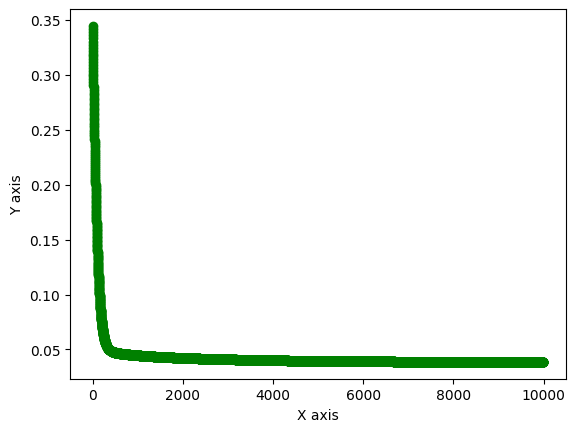

train RMSE score: 0.1010227988469151
train R2 score: 0.5015305867684814

test RMSE score: 0.08896333130914923
test R2 score: 0.5464124606358156

Coefficients: [0.3987557781867322, 0.06740614747950364, 0.16915891800542443, 0.10753048190775481, 0.22985784204457316]



----------------



Iteration 62
features selected:  ['bathrooms', 'airconditioning', 'stories', 'parking', 'bedrooms']
Beginning descent...
Lowest cost:  0.04145591110166581


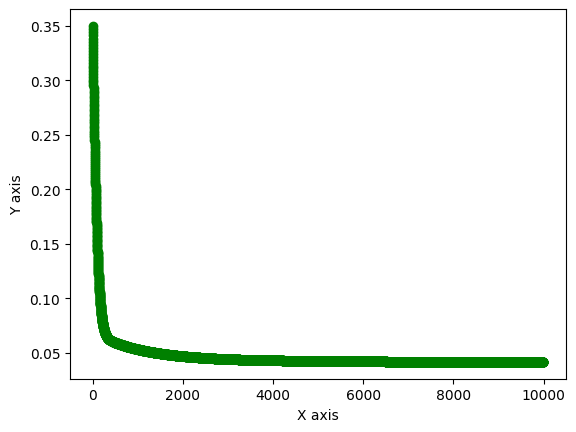

train RMSE score: 0.10419868140498516
train R2 score: 0.46969689759340794

test RMSE score: 0.09101055840334822
test R2 score: 0.525296319070605

Coefficients: [0.3567487030177434, 0.08254716096600247, 0.0971246146265222, 0.11819718702808504, 0.291810769433368]



----------------



Iteration 63
features selected:  ['area', 'bathrooms', 'airconditioning', 'stories', 'parking', 'bedrooms']
Beginning descent...
Lowest cost:  0.039714014166994535


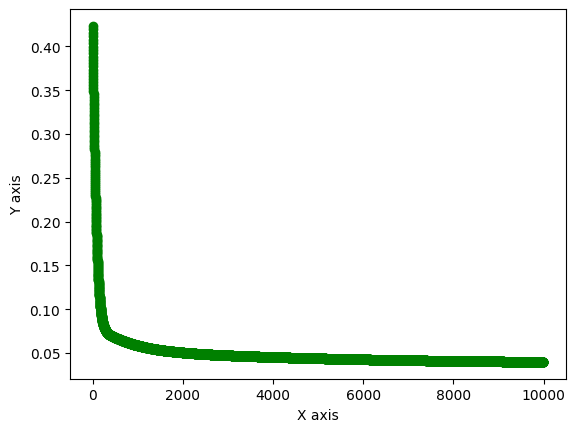

train RMSE score: 0.10127872018480558
train R2 score: 0.49900183987194946

test RMSE score: 0.0890720829096342
test R2 score: 0.545302823206038

Coefficients: [0.18029621041334418, 0.1317382314678026, 0.07391865226368995, 0.11312428126163185, 0.11276596161107158, 0.32726448885035664]



----------------





In [27]:
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error,r2_score
import itertools
import math

# Feature selection

print('Starting exhaustive search...\n')
count = 1

max_r2 = 0
best_features = []
best_coefficient = []

for i in range(len(high_corr) + 1):
    for subset in itertools.combinations(high_corr, i):
        if len(subset)>0:
            
            print('Iteration '+str(count))
            print('features selected: ',list(subset))
            print('Beginning descent...')
            feature_select = list(subset)
            theta = np.random.rand(len(feature_select)).tolist()

            Y = df['price']
            X = df[feature_select]

            X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.25, random_state = 0)
            X_train.reset_index(drop=True, inplace=True)
            y_train.reset_index(drop=True, inplace=True)
            X_test.reset_index(drop=True, inplace=True)
            y_test.reset_index(drop=True, inplace=True)

            cost, c, theta = gradientDescent(X_train,y_train,theta,0.01,10000,0.01)

            print('Lowest cost: ' ,c)
            
            plt.scatter(x=list(range(len(cost))), y = cost, color='green')
            plt.xlabel("X axis")
            plt.ylabel("Y axis")
            plt.show()

            y_new = hypothesis(theta, X_test)
            y_new = np.sum(y_new, axis=1)

            y_pred_train = hypothesis(theta,X_train)
            y_pred_train = np.sum(y_pred_train,axis=1)

            print('train RMSE score:', np.sqrt(mean_squared_error(y_train,y_pred_train)))
            print('train R2 score:',r2_score(y_train,y_pred_train))

            print('\ntest RMSE score:', np.sqrt(mean_squared_error(y_test,y_new)))
            r2 = r2_score(y_test,y_new)
            print('test R2 score:',r2)

            if r2 > max_r2:
                max_r2 = r2
                best_features = feature_select
                best_coefficient = theta
                print('Improvement detected!')

            print('\nCoefficients:' ,theta)
            print('\n\n')
            print('----------------')
            print('\n\n')

            count += 1

    

In [29]:
print("Best R2 score: " , max_r2)
print('Best features:', best_features)
print('Best coefficient:',best_coefficient)

Best R2 score:  0.6057614269621956
Best features: ['area', 'bathrooms', 'airconditioning', 'parking', 'bedrooms']
Best coefficient: [0.23781448980011233, 0.41434307312521107, 0.07826828215149435, 0.08973244793403076, 0.22096317692611697]


In [30]:

theta

[0.18029621041334418,
 0.1317382314678026,
 0.07391865226368995,
 0.11312428126163185,
 0.11276596161107158,
 0.32726448885035664]